In [4]:
import os
from skimage.io import imread
from skimage.measure import *
import numpy as np
import sys
sys.path.append("D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\dlip-project-cs31")

import utils
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def pretty_print(data, n=9):
    plt.figure(figsize=(2 * n, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        plt.imshow(data[i].reshape(image_dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

folder_path = "D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\dlip-project-cs31\\greyscale_pairs"
num_samples = 5000
image_dims = (128, 128)

x = np.ndarray((num_samples, image_dims[0], image_dims[1]))
y = np.ndarray((num_samples, image_dims[0], image_dims[1]))
for i in range(num_samples):
    x[i] = imread("{}/f_fbp/{}.tif".format(folder_path, i))
    y[i] = imread("{}/f_true/{}.tif".format(folder_path, i))
    
# Normalize values
x = x.astype('float32') / 255.
y = y.astype('float32') / 255.

# Desired shape for keras is (n_samples, x, y, n_channels)
x = np.reshape(x, (len(x), image_dims[0], image_dims[1], 1))
y = np.reshape(y, (len(y), image_dims[0], image_dims[1], 1))


(128, 128, 1)


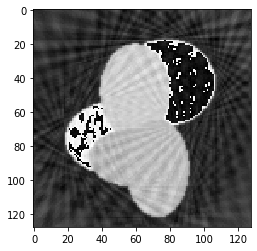

In [5]:
x_train_fbp, x_test_fbp, y_train_fbp, y_test_fbp = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train_fbp[0].shape)
y_train_fbp.shape

y_test_fbp.shape

# pretty_print(x_test_fbp)

# pretty_print(y_test_fbp)

plt.imshow(x_test_fbp[1].reshape(image_dims))
plt.gray()

plt.show()

-----------------------------------------
keras-unet init: TF version is < 2.0.0 or not present - using `Keras` instead of `tf.keras`
-----------------------------------------
Instructions for updating:
Use tf.cast instead.


D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\utils.py:33: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr.append(skimage.measure.compare_psnr(y_test[i], predicted_y[i]))
D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\utils.py:36: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  predicted_y[i].reshape(image_dims))
D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\utils.py:43: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  use_sample_covariance=False
D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\utils.py

PSNR is 26.89
Generic SSIM is 95.76%
Wang SSIM is 95.97%


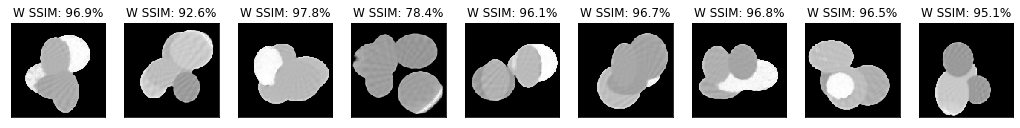

In [7]:
from model import unet
from keras_unet.models import custom_unet
from keras.models import load_model

model = load_model("D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\keras-unet\\unet_grayscale_keras.h5")
# model.load_weights("D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\keras-unet\\unet_grayscale_keras.h5")
y_pred_unet = model.predict(x_test_fbp)

y_pred_unet.shape

x_test_fbp.shape



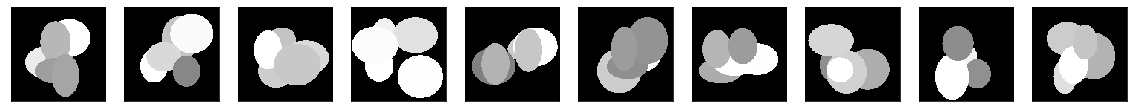

PSNR is 26.89
Generic SSIM is 95.76%
Wang SSIM is 95.97%


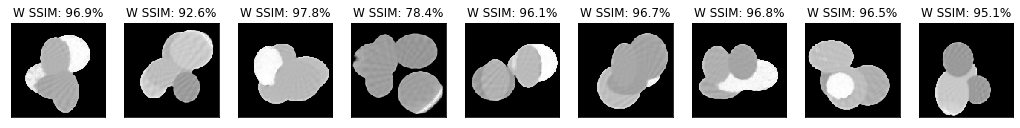

In [8]:
utils.pretty_print(y_test_fbp)

utils.show_results(x_test_fbp, y_test_fbp, y_pred_unet)

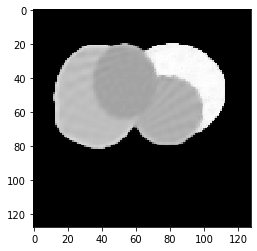

In [16]:
plt.imshow(y_pred_unet[999].reshape(image_dims))
plt.gray()
plt.show()

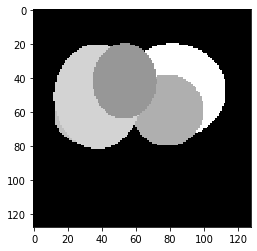

In [15]:
plt.imshow(y_test_fbp[999].reshape(image_dims))
plt.gray()
plt.show()